# Test 3: "Real-world" waveform with noise

Just like with the sinusoid test, we can use audio recordings of real-world sounds as a basis for testing the system performance on more complex waveforms, and add progressive levels of white noise for each iteration. 

In the "Data" folder you can find a number of audio files you can use as test input. Most of these files contain a short recording of a continuous musical note. If you wish to adjust the samping frequency of the sound files, take a look at the function [`resample`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html) in the `scipy.signal` module.

Create a python program which lads a specific audio file and adds progressively increasing levels of white gaussian noise before feeding it into the attached function `freq_detection`. Subsequently, your program should provide an analysis of the outuput from the function `freq_detection` for the various noise levels, which can take the form of a plot showing the frequency detection system's error as a function of SNR. This will be useful when evaluating the frequency detection system's performance in the presence of noise. Measuring the frequency estimate error in such a way will allow us to evaluate two things:

1. How well the frequency detection system can estimate the fundamental frequency of a "real-world" periodic waveform
2. The effect of white noise interference on the frequency detection system when applied to a "real-world" periodic waveform

P.S. You can determine appropriate noise power(s) by calculating the average power in the audio clip as a basis for and scaling by desired SNR

noiseVarList = [1.00000000e-03 1.04249094e-03 1.08678736e-03 1.13296598e-03
 1.18110676e-03 1.23129310e-03 1.28361190e-03 1.33815378e-03
 1.39501319e-03 1.45428861e-03 1.51608270e-03 1.58050248e-03
 1.64765951e-03 1.71767011e-03 1.79065553e-03 1.86674217e-03
 1.94606179e-03 2.02875179e-03 2.11495536e-03 2.20482180e-03
 2.29850675e-03 2.39617246e-03 2.49798808e-03 2.60412994e-03
 2.71478187e-03 2.83013550e-03 2.95039062e-03 3.07575549e-03
 3.20644723e-03 3.34269218e-03 3.48472631e-03 3.63279561e-03
 3.78715651e-03 3.94807635e-03 4.11583382e-03 4.29071946e-03
 4.47303617e-03 4.66309968e-03 4.86123916e-03 5.06779778e-03
 5.28313327e-03 5.50761857e-03 5.74164246e-03 5.98561024e-03
 6.23994444e-03 6.50508554e-03 6.78149274e-03 7.06964474e-03
 7.37004059e-03 7.68320054e-03 8.00966695e-03 8.35000522e-03
 8.70480479e-03 9.07468012e-03 9.46027181e-03 9.86224764e-03
 1.02813038e-02 1.07181661e-02 1.11735910e-02 1.16483674e-02
 1.21433175e-02 1.26592984e-02 1.31972039e-02 1.37579655e-02
 1.434255

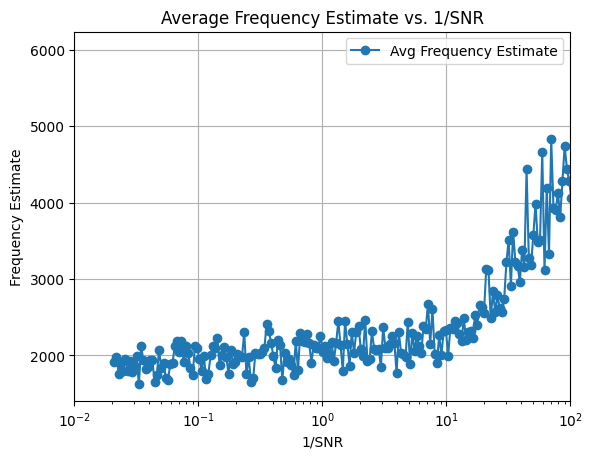

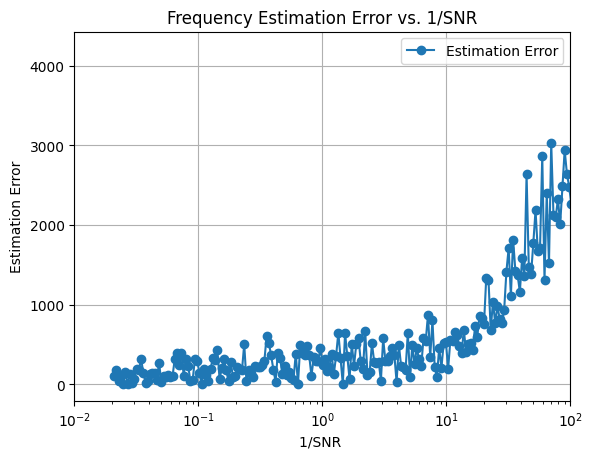

In [1]:
from baseline_algorithm import freq_detection
# WRITE YOUR CODE IN THIS CELL:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as signal
from baseline_algorithm import freq_detection  # Assuming this is defined
import os


path = "sample_audio/A4_oboe.wav"

fs, audio_signal = wav.read(path)


desiredFs = 20000  

#increasing the signal resolution
if fs != desiredFs:
    audio_signal = signal.resample(audio_signal, int(len(audio_signal) * desiredFs / fs))
    fs = desiredFs

audio_signal = audio_signal / np.max(np.abs(audio_signal))


noiseVarList = np.logspace(-3, 1.5, 250)  

print(f"noiseVarList = {noiseVarList}")

snrList = []
avgFreqEstimates = []
errorList = []

iteration = 1

for noiseVar in noiseVarList:
    noise = np.random.normal(scale=np.sqrt(noiseVar), size=len(audio_signal))
    noisySignal = audio_signal + noise
    
    _, freqEst = freq_detection(noisySignal, fs)

    fundamentalFreq = 1800 
    error = np.abs(np.mean(freqEst) - fundamentalFreq)


    PSin = np.mean(audio_signal**2)  
    snr = PSin / noiseVar  
    print(f"1/snr for the {iteration}th iteration is:  {1/snr}")
    snrList.append(1 / snr)
    avgFreqEstimates.append(np.mean(freqEst))
    errorList.append(error)
    iteration = iteration + 1
    
    
print("SNR List:", snrList)

plt.figure()
plt.plot(snrList, avgFreqEstimates, marker='o', label="Avg Frequency Estimate")
#plt.axhline(fundamentalFreq, color='r', linestyle='--', label=f"True Frequency (A4 = {fundamentalFreq})")
plt.xscale('log')
plt.xlim(10**(-2), 10**2) 
#plt.ylim(0, 4000)
plt.xlabel('1/SNR')
plt.ylabel('Frequency Estimate')
plt.title('Average Frequency Estimate vs. 1/SNR')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(snrList, errorList, marker='o', label="Estimation Error")
plt.xscale('log')
plt.xlim(10**(-2), 10**2)
plt.xlabel('1/SNR ')
plt.ylabel('Estimation Error')
plt.title('Frequency Estimation Error vs. 1/SNR')
plt.legend()
plt.grid(True)
plt.show()

[Here](Figures/wavfileTest_LF.png) is an image showing a *suggestion* for what or test output may look like when using the audio in `A4_oboe.wav` as a signal. As we can see, the frequency detection system produces a stable but erroneous output when there is little noise, suggesting it has "locked on" to a harmonic rather than the fundamental frequency. It is also interesting to note that the noise will begin to cause the estimated frequency to fluctuate a lot earlier than in the case with the pure sinusoid, so while the average error remains more or less unchanged, the estimated frequency will vary significantly.